임의로 생성한 데이터로 CascadeAdaBoost를 적용해본다

In [1]:
import numpy as np # 계산 라이브러리 numpy -> np라고 사용
import matplotlib.pyplot as plt # 그래프 그리는 라이브러리 ->plt라고 사용, 데이터 시각화 할 때 사용(모듈)
from sklearn.ensemble import AdaBoostClassifier # 에이다 부스트
from sklearn.tree import DecisionTreeClassifier # 결정 트리구조
from sklearn.model_selection import train_test_split # 훈련 셋과 테스트 셋을 분리해주는 함수(train_test_split)을 사용
from sklearn.datasets import make_classification # 분류 문제를 임의로 생성(예제파일 생성)
from sklearn.decomposition import PCA # Principal Component Analysis: 주 성분 분석, 여러 변수 중 중요한 변수만 추출 -> 차원 축소 가능
from sklearn.metrics import accuracy_score # 정확도 계산 함수

# 데이터셋 생성
# malke_classification 분류 데이터 샘플
# 생성 n_sample 1000 -> 샘플 갯수: 1000개
# n_features = 20, random_state = 42 -> 특성: 20개, 랜덤 데이터 셋: 42를 가져옴
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# train_test_split 데이터셋 분할 -> 학습용(80%), 테스트용(20%) 
# 학습용 및 테스트용 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


2. 데이터 시각화(데이터셋 그림을 그림)

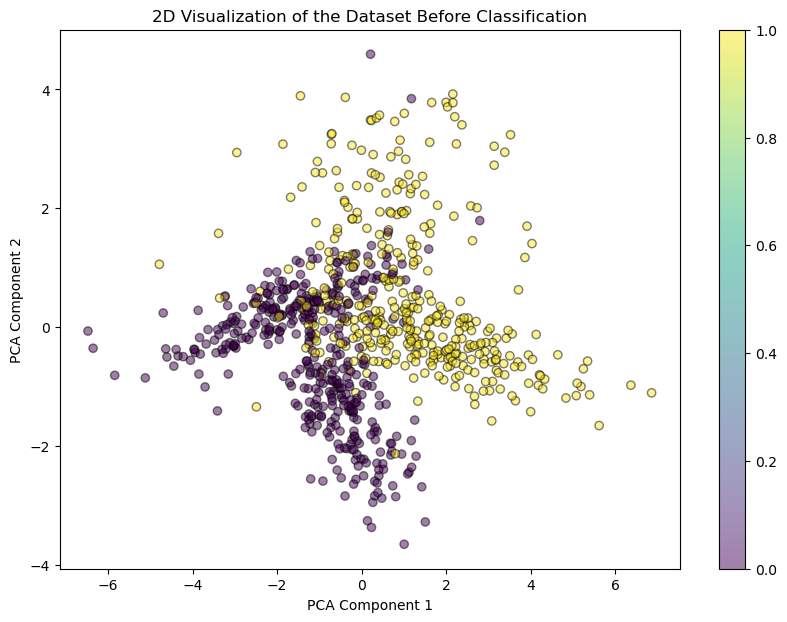

In [2]:
# PCA를 사용하여 2차원으로 축소 (시각화를 위해)
pca = PCA(n_components=2)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

# 데이터 시각화 (분류 전)
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], c=y_train, cmap='viridis', alpha=0.5, edgecolor='k')
plt.colorbar(scatter)
plt.title("2D Visualization of the Dataset Before Classification")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

3. 기본학습기 및 AdaBoost 모델 정의

In [3]:
# 기본 학습기 정의
# 깊이가 1인 결정 트리구조를 사용
base_estimator = DecisionTreeClassifier(max_depth=1)

4. CascadeAdaBoost 단계별 학습

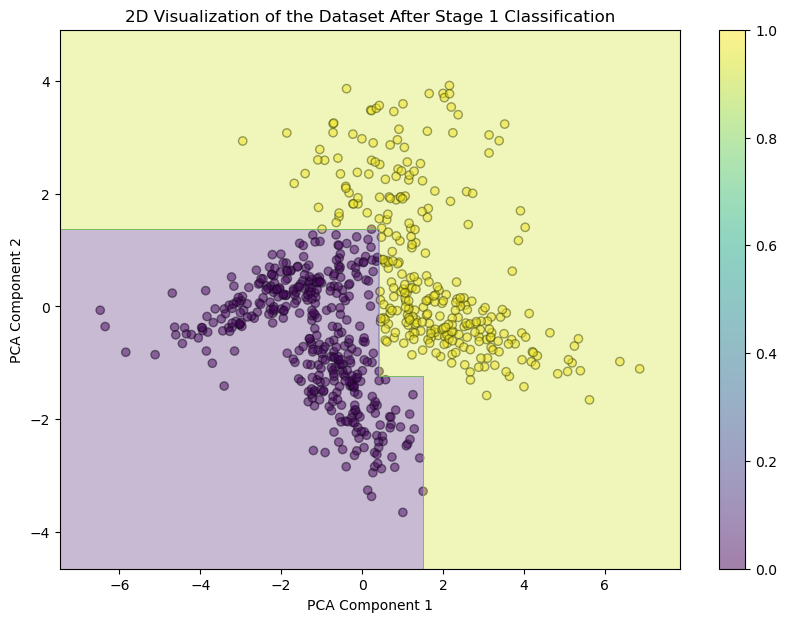

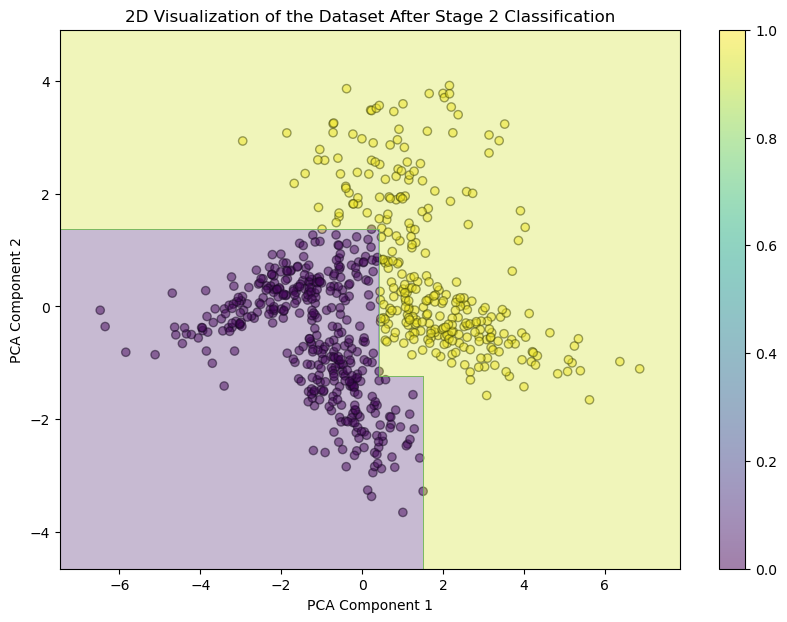

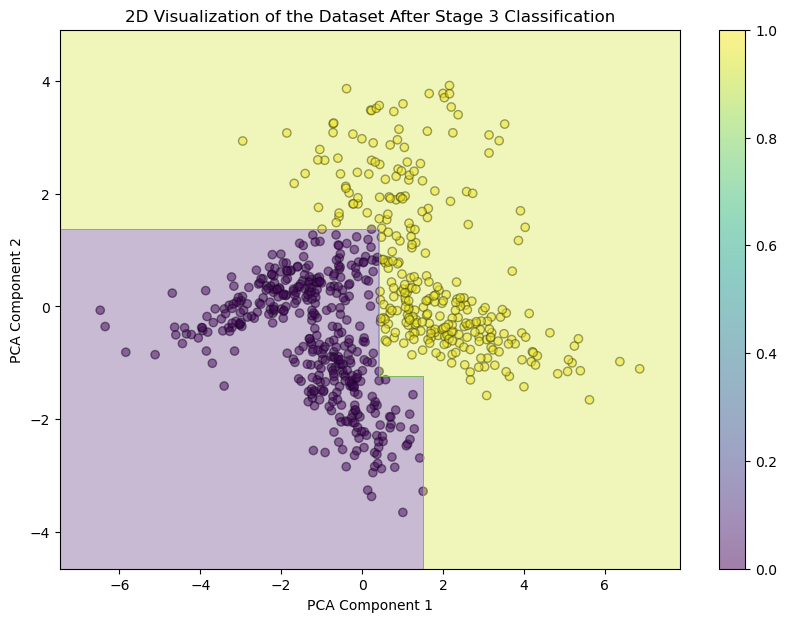

In [9]:
# cascade_stages =[]<- 비어있는 리스트 배열 생성
cascade_stages = []
# range(3): cascade를 3번 실행
for stage in range(3):
    model = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, learning_rate=1.0, random_state=42, algorithm='SAMME')
    model.fit(X_train_reduced, y_train)
    cascade_stages.append(model)
    # 긍정 예제 필터링 (예제 코드에서는 간략화)
    positive_indices = model.predict(X_train_reduced) == y_train
    X_train_reduced, y_train = X_train_reduced[positive_indices], y_train[positive_indices]
    
    # 단계별 학습 데이터 시각화
    plt.figure(figsize=(10, 7))
    x_min, x_max = X_train_reduced[:, 0].min() - 1, X_train_reduced[:, 0].max() + 1
    y_min, y_max = X_train_reduced[:, 1].min() - 1, X_train_reduced[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    scatter = plt.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], c=y_train, cmap='viridis', alpha=0.5, edgecolor='k')
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    plt.colorbar(scatter)
    plt.title(f"2D Visualization of the Dataset After Stage {stage+1} Classification")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()






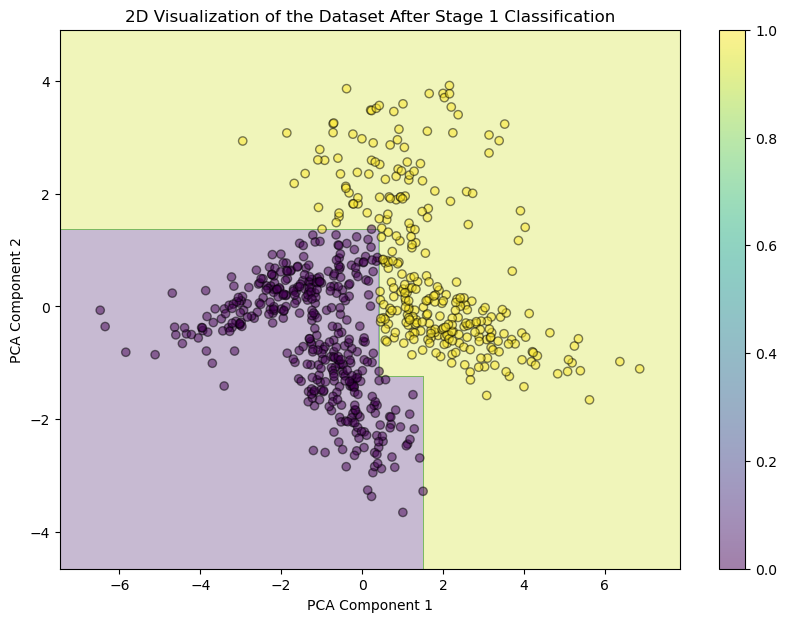

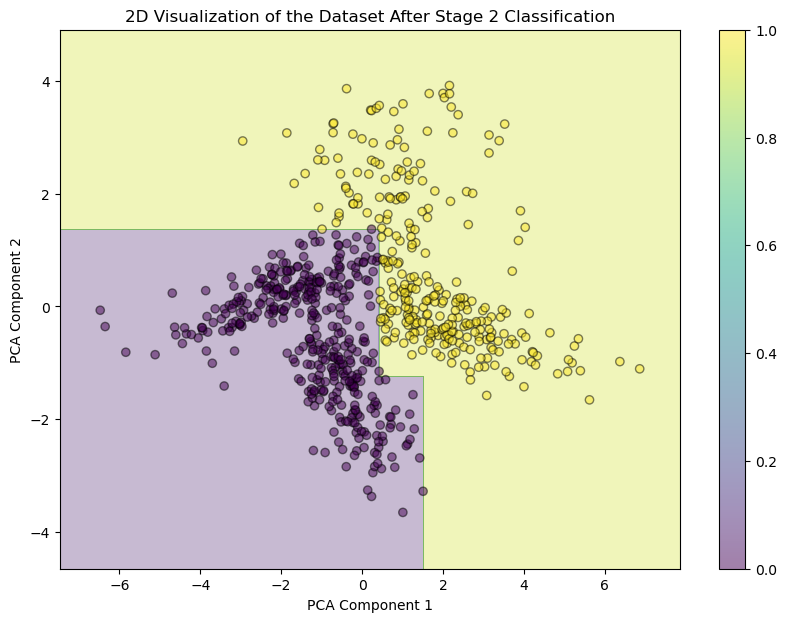

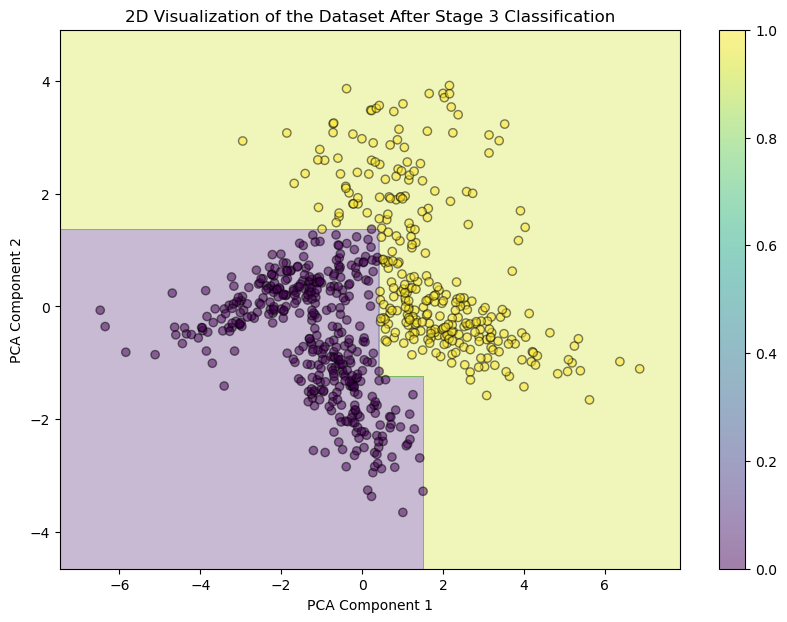

In [8]:
cascade_stages = []
for stage in range(3):
    model = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, learning_rate=1.0, random_state=42, algorithm='SAMME')
    model.fit(X_train_reduced, y_train)
    cascade_stages.append(model)
    # 긍정 예제 필터링 (예제 코드에서는 간략화)
    positive_indices = model.predict(X_train_reduced) == y_train
    X_train_reduced, y_train = X_train_reduced[positive_indices], y_train[positive_indices]

    # 단계별 학습 데이터 및 결정 경계 시각화
    plt.figure(figsize=(10, 7))
    x_min, x_max = X_train_reduced[:, 0].min() - 1, X_train_reduced[:, 0].max() + 1
    y_min, y_max = X_train_reduced[:, 1].min() - 1, X_train_reduced[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    scatter = plt.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], c=y_train, cmap='viridis', alpha=0.5, edgecolor='k')
    plt.colorbar(scatter)
    plt.title(f"2D Visualization of the Dataset After Stage {stage+1} Classification")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()

